In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import itertools
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go

In [3]:
data1 = np.random.rand(8, 8)
data2 = np.random.rand(8, 8)
tie1 = np.random.rand(8, 8)
tie2 = np.random.rand(8, 8)
#np.fill_diagonal(data1, None)
#np.fill_diagonal(data2, None)
#np.fill_diagonal(tie1, None)
#np.fill_diagonal(tie2, None)
n = 1
test_data = {'Cards':data1, 'Card_Ties':tie1, 'Tricks':data2, 'Trick_Ties':tie2, 'n':n}

In [29]:
def create_viz(format):
    data = test_data #this is the dictionary because we can ask for it in that dictionary?
    cards = data['Cards']
    var_cards = round(cards * 100)
    tricks = data['Tricks']
    var_tricks = round(tricks * 100)
    n = data['n']
    Cties = data['Card_Ties']
    card_ties = round(Cties * 100)
    Tties = data['Trick_Ties']
    trick_ties = round(Tties * 100)
    full_cards = []
    full_tricks = []
#card_ties = []
#for i in range(8):
    #for j in range(8):
        #new_card_ties = str(prob_p1card_round_t[i][j])[:-2]+' ('+str(tie_data[i][j])[:-2]+')'
        #card_ties+= [new_card_ties]
#card_ties=np.reshape(card_ties,(8,8))
    i=0
    while i < len(var_cards):
        Ctemp = []
        Ttemp = []
        Cprob_arr = var_cards[i]
        Ctie_arr = card_ties[i]
        Tprob_arr = var_tricks[i]
        Ttie_arr = trick_ties[i]
        j = 0
        while j < len(Cprob_arr):
            Chold1 = round(Cprob_arr[j])
            Chold2 = round(Ctie_arr[j])
            Ctemp.append(str(Chold1)+' ('+str(Chold2)+')')
            Thold1 = round(Tprob_arr[j])
            Thold2 = round(Ttie_arr[j])
            Ttemp.append(str(Thold1)+' ('+str(Thold2)+')')
            j += 1
        full_cards.append(Ctemp)
        full_tricks.append(Ttemp)
        i += 1
    np.fill_diagonal(var_cards, None)
    np.fill_diagonal(var_tricks, None)
    x_axis_labels = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'] #player 1 
    y_axis_labels = ['BBB','BBR','BRB','BRR','RBB','RBR','RRB','RRR'] #player 2
    if format == 'png':
        fig, ax = plt.subplots(figsize = (10,8))
        sns.heatmap(var_cards, annot= full_cards, annot_kws={"size": 10},linewidths=.5, cmap='Blues', fmt="",
                    ax=ax, cbar=False, vmin=0, vmax=100)
        #ax.set_title('Win by Cards', fontsize = 13)
        ax.set_title("Probability (%) of Player 1 Winning Penney's Game by Cards\n(n="+str(n)+'), [Win(Tie)]', fontsize = 17)
        ax.set_xlabel('Player 1 Guesses', fontsize=14)
        ax.set_ylabel('Player 2 Guesses', fontsize=14)
        ax.set_xticklabels(x_axis_labels, fontsize=12)
        ax.set_yticklabels(y_axis_labels, fontsize=12)
        ax.set_facecolor('slategray')
        
        cbar_ax = fig.add_axes([.95, 0.11, 0.02, .77])
        cb = fig.colorbar(ax.collections[0], cax=cbar_ax)
        cb.outline.set_linewidth(.2)
        
        #plt.suptitle("Probability (%) of Player 1 Winning Penney's Game by Cards (n="+str(n)+')', y=1, fontsize = 17)
        plt.savefig('figures/h3eatmap_cards_n'+str(n)+'.png', bbox_inches = 'tight', facecolor = 'white')
        plt.show()
        ########
        fig, ax = plt.subplots(figsize = (10,8))
        sns.heatmap(var_tricks, annot= full_tricks, annot_kws={"size": 10},linewidths=.5, cmap='Blues', fmt="",
                    
                    ax=ax, cbar=False, vmin=0, vmax=100)
        #ax.set_title('Win by Tricks', fontsize = 13)
        ax.set_title("Probability (%) of Player 1 Winning Penney's Game by Tricks\n(n="+str(n)+'), [Win(Tie)]', fontsize = 17)
        ax.set_xlabel('Player 1 Guesses', fontsize=14)
        ax.set_ylabel('Player 2 Guesses', fontsize=14)
        ax.set_xticklabels(x_axis_labels, fontsize=12)
        ax.set_yticklabels(y_axis_labels, fontsize=12)
        ax.set_facecolor('slategray')
        
        cbar_ax = fig.add_axes([.95, 0.11, 0.02, .77])
        cb = fig.colorbar(ax.collections[0], cax=cbar_ax)
        cb.outline.set_linewidth(.2)
        
        #plt.suptitle("Probability (%) of Player 1 Winning Penney's Game by Tricks (n="+str(n)+')', y=1, fontsize = 17)
        plt.savefig('figures/h3eatmap_tricks_n'+str(n)+'.png', bbox_inches = 'tight', facecolor = 'white')
        plt.show()
    elif format == 'html':
        fig = go.Figure(data = go.Heatmap(
                z = var_cards, colorscale = 'Blues',
                hovertemplate = "P1: %{x} <br />P2: %{y}", name = "", # the name part stops 'trace=0' from popping up
                text=full_cards, texttemplate='%{text}',
                x = x_axis_labels, y = y_axis_labels, hoverongaps = False,
                colorbar=dict(
                    tickvals=[0, 20, 40, 60, 80, 100],  # Positions of the ticks
                    ticktext=[0, 20, 40, 60, 80, 100],   # Labels for the ticks
                    outlinewidth=1,  # Thin outline width
                    outlinecolor='gray' 
                ),
                zmin=0,
                zmax=100
        ))
        fig.update_layout(plot_bgcolor='grey', 
                          title = "Probability (%) of Player 1 Winning Penney's Game by Cards<br>(n="+str(n)+'), [Win(Tie)]', 
                          title_x = 0.5, title_y = 0.9, title_font_size = 20, 
                          xaxis = dict(title = 'Player 1 Guesses'),
                          yaxis = dict(title = 'Player 2 Guesses'), width = 800, height = 800)
        fig.update_traces(xgap = 1, ygap = 1)
        fig.update_xaxes(showgrid=True, gridcolor='white')
        fig.update_yaxes(showgrid=True, gridcolor='white')
        fig.show()
        path = 'figures/h3eatmap_cards_n'+str(n)+'.html'
        fig.write_html(path)
        ###
        fig = go.Figure(data = go.Heatmap(
                z = var_tricks, colorscale = 'Blues', customdata = card_ties,
                hovertemplate = "P1: %{x}, P2: %{y}<br />Win Probability: %{z}<br />Tie Probability: %{custom_data}", name = "",
                text=full_tricks, texttemplate='%{text}',
                x = x_axis_labels, y = y_axis_labels, hoverongaps = False,
                colorbar=dict(
                    tickvals=[0, 20, 40, 60, 80, 100],  # Positions of the ticks
                    ticktext=[0, 20, 40, 60, 80, 100],   # Labels for the ticks
                    outlinewidth=1,  # Thin outline width
                    outlinecolor='gray' 
                ),
                zmin=0,
                zmax=100
        ))
        fig.update_layout(plot_bgcolor='grey',
                          title = "Probability (%) of Player 1 Winning Penney's Game by Tricks<br>(n="+str(n)+'), [Win(Tie)]',
                          title_x = 0.5, title_y = 0.9, title_font_size = 20, 
                          xaxis = dict(title = 'Player 1 Guesses'), 
                          yaxis = dict(title = 'Player 2 Guesses'), width = 800, height = 800)
        fig.update_traces(xgap = 1, ygap = 1)
        fig.update_xaxes(showgrid=True, gridcolor='white')
        fig.update_yaxes(showgrid=True, gridcolor='white')
        fig.show()
        path = 'figures/h3eatmap_tricks_n'+str(n)+'.html'
        fig.write_html(path)
    else:
        print('format unsupported')
    return

In [23]:
create_viz('lng')

format unsupported


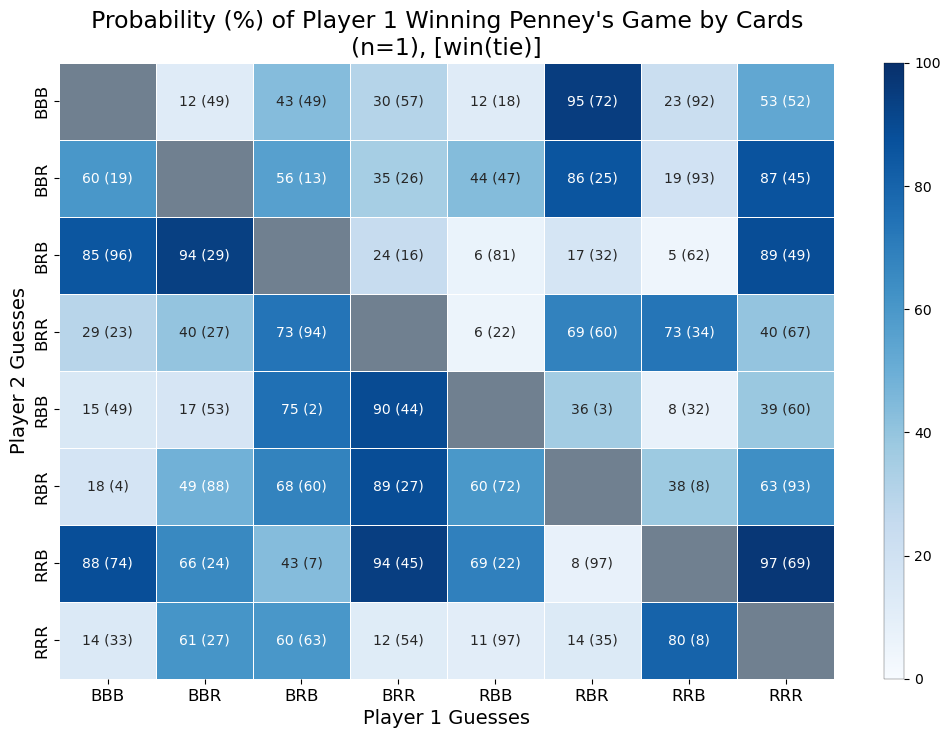

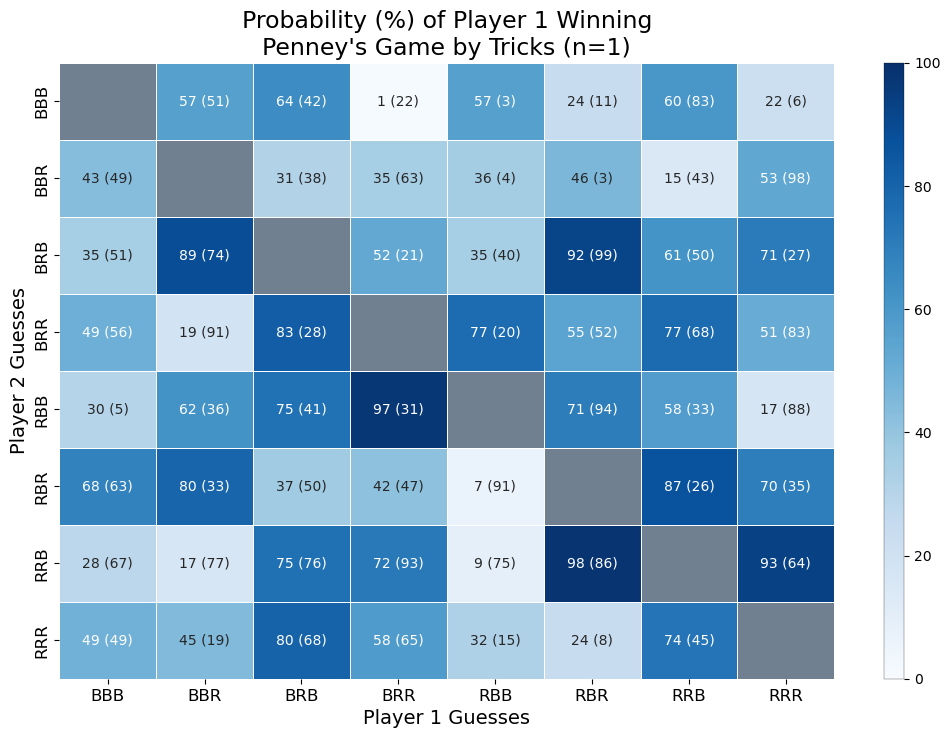

In [22]:
create_viz('png')

In [30]:
create_viz('html')

TypeError: type numpy.ndarray doesn't define __round__ method

In [83]:
fig = go.Figure(data = go.Heatmap(
                z = var_cards, colorscale = 'Blues',
                hovertemplate = "P1: %{x} <br /> P2: %{y}", name = "", # the name part stops 'trace=0' from popping up
                text=var_cards, texttemplate='%{text:.0f}',
                x = x_axis_labels, y = y_axis_labels, hoverongaps = False))
fig.update_layout(
    title = "Probability (%) of Player 1 Winning Penney's Game (n="+str(n)+')',
    title_x = 0.5,
    title_y = 0.9,
    title_font_size = 20,
    xaxis = dict(title = 'Player Two Choice'),
    yaxis = dict(title = 'Player One Choice'),
    width = 600, height = 600)
fig.update_traces(xgap = 1, ygap = 1)
fig.show()
path = 'figures/h3eatmap_tricks_n'+str(n)+'.html'
fig.write_html(path)

NameError: name 'var_cards' is not defined

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        sns.heatmap(var_cards, annot= True, annot_kws={"size": 9},linewidths=.5, fmt=".0f", cmap='Blues', 
                    ax=ax1, cbar=False, vmin=0, vmax=100)
        ax1.set_title('Win by Cards', fontsize = 13)
        ax1.set_xlabel('Player 1 Guesses', fontsize=10)
        ax1.set_ylabel('Player 2 Guesses', fontsize=10)
        ax1.set_xticklabels(x_axis_labels, fontsize=8)
        ax1.set_yticklabels(y_axis_labels, fontsize=8)
        ax1.set_facecolor('slategray')
    
        sns.heatmap(var_tricks, annot= True, annot_kws={"size": 9},linewidths=.5, fmt=".0f", cmap='Blues', 
                    ax=ax2, cbar=False, vmin=0, vmax=100)
        ax2.set_title('Win by Tricks', fontsize = 13)
        ax2.set_xlabel('Player 1 Guesses', fontsize=10)
        ax2.set_ylabel('Player 2 Guesses', fontsize=10)
        ax2.set_xticklabels(x_axis_labels, fontsize=8)
        ax2.set_yticklabels(y_axis_labels, fontsize=8)
        ax2.set_facecolor('slategray')
    
        cbar_ax = fig.add_axes([.95, 0.11, 0.02, .77])
        cb = fig.colorbar(ax1.collections[0], cax=cbar_ax)
        cb.outline.set_linewidth(.2)
        
        plt.subplots_adjust(wspace=0.25)
        plt.suptitle("Probability (%) of Player 1 Winning Penney's Game (n="+str(n)+')', y=1.07, fontsize = 17)
        plt.savefig('figures/h3eatmap_n'+str(n)+'.png', bbox_inches = 'tight', facecolor = 'white')
        plt.show()

In [34]:
cards = test_data['Cards']
var_cards = cards * 100
tricks = test_data['Tricks']
var_tricks = tricks * 100
n = test_data['n']
Cties = test_data['Card_Ties']
card_ties = Cties * 100
Tties = test_data['Trick_Ties']
trick_ties = Tties * 100
#print(var_cards, var_tricks, n, card_ties, trick_ties)
full_cards = []
full_tricks = []
#for i in var_cards:
i=0
while i < len(var_cards):
    Ctemp = []
    Ttemp = []
    Cprob_arr = var_cards[i]
    Ctie_arr = card_ties[i]
    Tprob_arr = var_tricks[i]
    Ttie_arr = trick_ties[i]
    j = 0
    while j < len(Cprob_arr):
        #print(round(prob_arr[0]))
        Chold1 = round(Cprob_arr[j])
        Chold2 = round(Ctie_arr[j])
        Ctemp.append(str(Chold1)+' ('+str(Chold2)+')')
        Thold1 = round(Tprob_arr[j])
        Thold2 = round(Ttie_arr[j])
        Ttemp.append(str(Thold1)+'('+str(Thold2)+')')
        j += 1
    full_cards.append(Ctemp)
    full_tricks.append(Ttemp)
    i += 1
#print(var_tricks[0])

In [36]:
print(full_cards)
print(full_tricks)

[['59 (31)', '74 (48)', '18 (47)', '18 (24)', '73 (3)', '60 (79)', '90 (84)', '60 (85)'], ['8 (15)', '71 (41)', '18 (85)', '86 (43)', '99 (91)', '44 (56)', '8 (73)', '57 (23)'], ['39 (33)', '70 (95)', '11 (45)', '10 (93)', '18 (65)', '74 (69)', '27 (40)', '75 (74)'], ['82 (58)', '73 (48)', '100 (81)', '26 (59)', '24 (68)', '65 (37)', '28 (1)', '46 (50)'], ['7 (62)', '28 (70)', '26 (61)', '90 (46)', '59 (44)', '20 (90)', '75 (20)', '81 (16)'], ['71 (83)', '25 (70)', '68 (98)', '85 (19)', '34 (91)', '46 (87)', '75 (79)', '99 (47)'], ['73 (18)', '79 (49)', '94 (35)', '24 (17)', '28 (49)', '52 (87)', '12 (8)', '7 (83)'], ['1 (93)', '30 (70)', '39 (96)', '78 (62)', '38 (41)', '27 (80)', '9 (27)', '100 (46)']]
[['31(69)', '69(31)', '58(1)', '30(79)', '4(50)', '10(100)', '95(46)', '23(42)'], ['30(17)', '67(43)', '39(18)', '30(11)', '85(72)', '69(33)', '58(11)', '67(96)'], ['86(61)', '40(35)', '44(74)', '43(76)', '99(27)', '78(81)', '91(83)', '28(18)'], ['22(78)', '70(2)', '39(26)', '9(64)', '